Vi leser inn datasett, plotter det og regner ut gradienten i et punkt. 

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [3]:
slp = xr.open_dataset('./../data/slp-feb-clim.nc')

In [4]:
hgt500 = xr.open_dataset('./../data/500gph-feb-clim.nc')
hgt200 = xr.open_dataset('./../data/200gph-feb-clim.nc')

Vi skal ta gradienten i nord-sør retning, så da må vi finne ut oppløsningen til datasettet (så hvor langt det er mellom punktene, først i lat-retning) 

In [5]:
deltaLat = np.abs(slp.lat[1]-slp.lat[0]) #absoluttverdi
print(deltaLat.values)

2.5


Vi plotter en figur for å se hvordan feltet vårt ser ut og hvilke gradienter vi kan bruke til å beregne gradienten i punktet 55S,170E. 

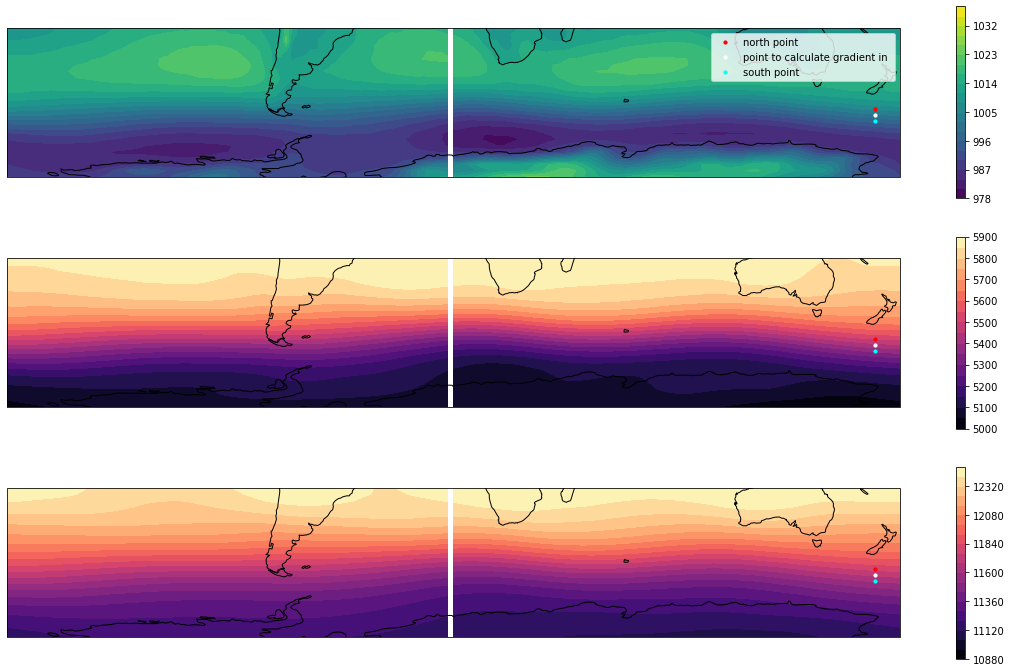

In [6]:
fig,axs = plt.subplots(nrows=3,subplot_kw={'projection' : ccrs.PlateCarree()},figsize=(20,12))

ax = axs[0]
c = ax.contourf(slp.lon,slp.lat,slp.slp.isel(time=0),levels=20)
ax.coastlines()
ax.set_ylim([-80,-20])
ax.scatter(170,-55+deltaLat,color='r',s = 10,label='north point')
ax.scatter(170,-55,color='white',s = 10,label='point to calculate gradient in ')
ax.scatter(170,-55-deltaLat,color='cyan',s = 10,label='south point')
ax.legend()

fig.colorbar(c,ax=ax)

ax = axs[1]
c = ax.contourf(hgt500.lon,hgt500.lat,hgt500.hgt.isel(time=0),cmap='magma',levels=20)
ax.coastlines()
ax.set_ylim([-80,-20])
ax.scatter(170,-55+deltaLat,color='r',s = 10,label='north point')
ax.scatter(170,-55,color='white',s = 10,label='point to calculate gradient in ')
ax.scatter(170,-55-deltaLat,color='cyan',s = 10,label='south point')
fig.colorbar(c,ax=ax)

ax = axs[2]
c = ax.contourf(hgt200.lon,hgt200.lat,hgt200.hgt.isel(time=0),cmap='magma',levels=20)
ax.coastlines()
ax.set_ylim([-80,-20])
ax.scatter(170,-55+deltaLat,color='r',s = 10,label='north point')
ax.scatter(170,-55,color='white',s = 10,label='point to calculate gradient in ')
ax.scatter(170,-55-deltaLat,color='cyan',s = 10,label='south point')
fig.colorbar(c,ax=ax)


Når vi regner ut gradienten tar vi ut det punktet nord for 55S og sør for punktet (hhv. rød og cyan-farge prikk på kartet), og så deler vi på avstanden mellom dem. 

In [8]:
slp_n = slp.sel(lat=-55+deltaLat,lon=170).slp #slp i punktet nord for 55S
slp_s = slp.sel(lat=-55-deltaLat,lon=170).slp #slp i punktet sør for 55S

slp_grad = (slp_n-slp_s)/(2*deltaLat*111e3) # slp nord - slp sør delt på avstand (2*2.5)

Print veridien

In [9]:
print('gradienten i slp i 55S, 170E er', slp_grad.values, 'hPa/m')

gradienten i slp i 55S, 170E er [1.64985176e-05] hPa/m


In [10]:
hgt_n = hgt500.sel(lat=-55+deltaLat,lon=160).hgt
hgt_s = hgt500.sel(lat=-55-deltaLat,lon=160).hgt

hgt_grad = (hgt_n-hgt_s)/(2*deltaLat*111e3)

In [11]:
print('gradienten i geopotensialhøyden på 500 hPa i 55S, 170E er', hgt_grad.values,'m/m')

gradienten i geopotensialhøyden på 500 hPa i 55S, 170E er [0.00026588] m/m


Så kan man gjøre det samme med geopotensialhøyden på 200 hPa. 

---

# Oppgavegjennomgang 03.03.21


In [12]:
slp_anom = xr.open_dataset('../data/slp-anomali-21feb2011.nc')
hgt500_anom = xr.open_dataset('../data/500gph-anomali-21feb2011.nc')
hgt200_anom = xr.open_dataset('../data/200gph-anomali-21feb2011.nc')

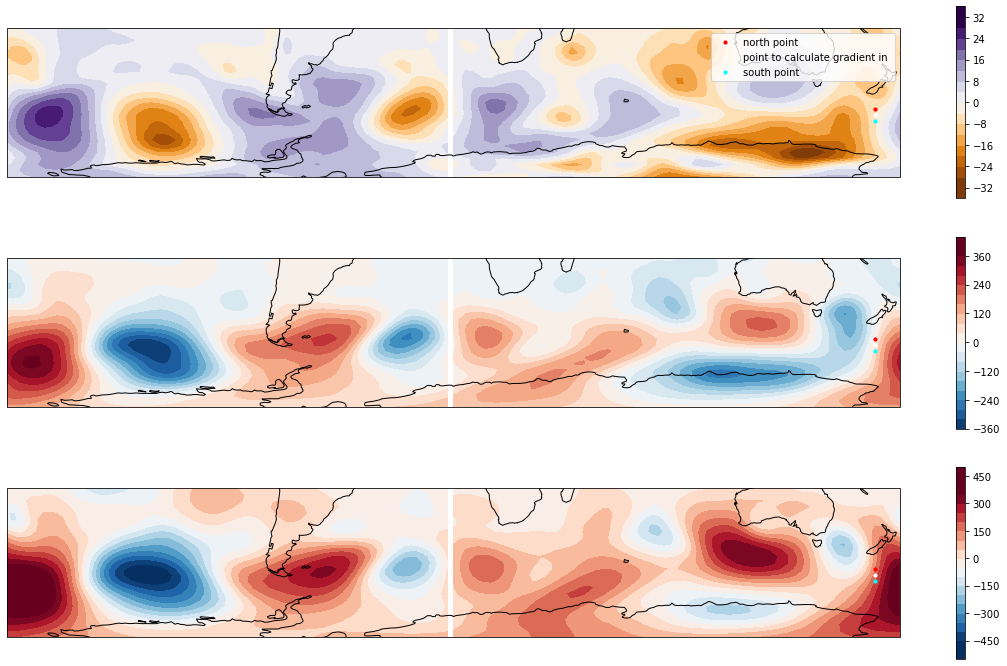

In [19]:
fig,axs = plt.subplots(nrows=3,subplot_kw={'projection' : ccrs.PlateCarree()},figsize=(20,12))

ax = axs[0]
c = ax.contourf(slp_anom.lon,slp_anom.lat,slp_anom.slp.isel(time=0),levels=20,cmap='PuOr',vmin=-30,vmax=30)
ax.coastlines()
ax.set_ylim([-80,-20])
ax.scatter(170,-55+deltaLat,color='r',s = 10,label='north point')
ax.scatter(170,-55,color='white',s = 10,label='point to calculate gradient in ')
ax.scatter(170,-55-deltaLat,color='cyan',s = 10,label='south point')
ax.legend()

fig.colorbar(c,ax=ax)

ax = axs[1]
c = ax.contourf(hgt500_anom.lon,hgt500_anom.lat,hgt500_anom.hgt.isel(time=0),cmap='RdBu_r',vmin=-360,vmax=360,levels=20)
ax.coastlines()
ax.set_ylim([-80,-20])
ax.scatter(170,-55+deltaLat,color='r',s = 10,label='north point')
ax.scatter(170,-55,color='white',s = 10,label='point to calculate gradient in ')
ax.scatter(170,-55-deltaLat,color='cyan',s = 10,label='south point')
fig.colorbar(c,ax=ax)

ax = axs[2]
c = ax.contourf(hgt200_anom.lon,hgt200_anom.lat,hgt200_anom.hgt.isel(time=0),cmap='RdBu_r',vmin=-450,vmax=350,levels=20)
ax.coastlines()
ax.set_ylim([-80,-20])
ax.scatter(170,-55+deltaLat,color='r',s = 10,label='north point')
ax.scatter(170,-55,color='white',s = 10,label='point to calculate gradient in ')
ax.scatter(170,-55-deltaLat,color='cyan',s = 10,label='south point')
fig.colorbar(c,ax=ax)


In [26]:
slp_E = slp_anom.sel(lat=-55,lon=170+2.5).slp.values
slp_W = slp_anom.sel(lat=-55,lon=170-2.5).slp.values

In [28]:
slp_anom_grad = (slp_E - slp_W)/(2*2.5*111*1e3*np.cos(np.deg2rad(-55)))

In [40]:
slp_anom_grad

array([1.7808115e-05], dtype=float32)

In [35]:
def calcGrad_point(da,lat,lon,VAR): 
    '''
    Regner ut gradienten i et punkt, med "centered differences"
    
    input: 
        da : datasettet (xarray dataset)
        lat : latitude 
        lon : longitude
        VAR : variablen datasettet (str)
    
    
    returns:
        gradNS : gradienten i nord-sør retning
        gradEW : gradienten i øst-vest retning    
    '''
    
    deltaLon = np.abs(da.lon[1]-da.lon[0])
    deltaLat = np.abs(da.lat[1]-da.lat[0])
    
    da_E     = da.sel(lat=lat,lon=lon+deltaLon)[VAR]
    da_W     = da.sel(lat=lat,lon=lon-deltaLon)[VAR]
    
    da_N     = da.sel(lat=lat+deltaLat,lon=lon)[VAR]
    da_S     = da.sel(lat=lat-deltaLat,lon=lon)[VAR]
    
    
    grad_EW  = (da_E-da_W)/(2*deltaLon*111*1e3*np.cos(np.deg2rad(lat)))
    grad_NS  = (da_N-da_S)/(2*deltaLat*111*1e3)
    
    
    return grad_NS,grad_EW

In [37]:
slp_anom_grad_NS, slp_anom_grad_EW = calcGrad_point(slp_anom,-55,170,'slp')

In [41]:
hgt500_anom_grad_NS, hgt500_anom_grad_EW = calcGrad_point(hgt500_anom,-55,170,'hgt')

In [42]:
hgt500_anom_grad_EW

<xarray.DataArray (time: 1)>
array([0.00042241])
Coordinates:
    lat      float32 -55.0
  * time     (time) datetime64[ns] 2011-02-21

In [43]:
hgt500_anom_grad_NS

<xarray.DataArray (time: 1)>
array([-6.67264921e-05])
Coordinates:
    lon      float32 170.0
  * time     (time) datetime64[ns] 2011-02-21